In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from PIL import Image

## Full Data Collection

In [27]:
# Load the data
name = '12-06-2023-noconstains-onelayer'
with open(f'../Digit/analysis/{name}.pkl', 'rb') as f:
    interactions = pickle.load(f)

i_force = interactions['force']
i_positions = interactions['position']
i_tactile = interactions['tactile']
i_time = interactions['time']

In [28]:
# turn i_position from list of geometry pose messages into a list of dict
i_pose = []
for pos in i_positions:
    i_pose.append({
        'x': pos.position.x,
        'y': pos.position.y,
        'z': pos.position.z,
        'qx': pos.orientation.x,
        'qy': pos.orientation.y,
        'qz': pos.orientation.z,
        'qw': pos.orientation.w
    })

In [29]:
# split name on hyphen, take last two elements and save as new_name
new_name = '-'.join(name.split('-')[-2:])
print(new_name)

# pickle the new data with the old: i_force, i_pose, i_tactile, i_time
new_interactions = {
    'force': i_force,
    'pose': i_pose,
    'tactile': i_tactile,
    'time': i_time
}

with open(f'../Digit/analysis/{new_name}.pkl', 'wb') as f:
    pickle.dump(new_interactions, f)

noconstains-onelayer


In [5]:
# example force data: [fx, fy, fz]
i_force[0]

[-0.27085648706630144, 0.44286946193616805, -0.39868128479439513]

In [6]:
# example robot position data 
i_positions[0]

position: 
  x: -0.22316338291392043
  y: 0.5285807754153935
  z: 0.14929615676035818
orientation: 
  x: -0.46221646727428667
  y: -0.5407035031897984
  z: -0.700668051881098
  w: 0.05531672524566864

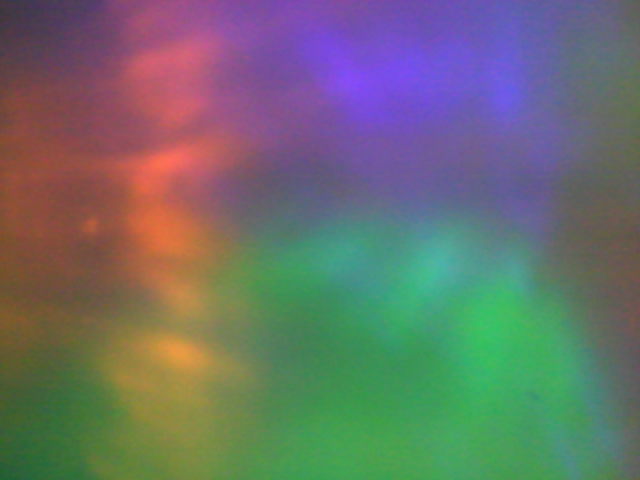

In [12]:
# example tactile data for DIGIT needs to be converted from RGB matrix to image
im = Image.fromarray(i_tactile[0])
# show image in notebook 
im

### Position Analysis

In [15]:

positions = []
orientations = []

for entry in i_positions:
    position = entry.position
    orientation = entry.orientation
    positions.append([position.x, position.y, position.z])
    orientations.append([orientation.x, orientation.y, orientation.z, orientation.w])

# Create a DataFrame with specified column names
df = pd.DataFrame({
    'px': [pos[0] for pos in positions],
    'py': [pos[1] for pos in positions],
    'pz': [pos[2] for pos in positions],
    'ox': [ori[0] for ori in orientations],
    'oy': [ori[1] for ori in orientations],
    'oz': [ori[2] for ori in orientations],
    'ow': [ori[3] for ori in orientations],
    'fx': [force[0] for force in i_force],
    'fy': [force[1] for force in i_force],
    'fz': [force[2] for force in i_force]
})

# Print the resulting DataFrame
print(df)

            px        py        pz        ox        oy        oz        ow   
0    -0.223163  0.528581  0.149296 -0.462216 -0.540704 -0.700668  0.055317  \
1    -0.223168  0.528586  0.149305 -0.462224 -0.540683 -0.700681  0.055292   
2    -0.223190  0.528604  0.149293 -0.462232 -0.540665 -0.700686  0.055332   
3    -0.223169  0.528597  0.149299 -0.462224 -0.540677 -0.700683  0.055318   
4    -0.223172  0.528613  0.149334 -0.462237 -0.540640 -0.700702  0.055334   
...        ...       ...       ...       ...       ...       ...       ...   
7566 -0.015976  0.730218  0.261798  0.429472 -0.536175 -0.036732  0.725756   
7567 -0.015041  0.733327  0.258719  0.442048 -0.538681 -0.044063  0.715873   
7568 -0.014275  0.735847  0.256487  0.452071 -0.540565 -0.049977  0.707760   
7569 -0.013926  0.737100  0.255378  0.456853 -0.541408 -0.052768  0.703831   
7570 -0.013705  0.737921  0.254681  0.459974 -0.541963 -0.054610  0.701226   

            fx        fy        fz  
0    -0.270856  0.442869 -

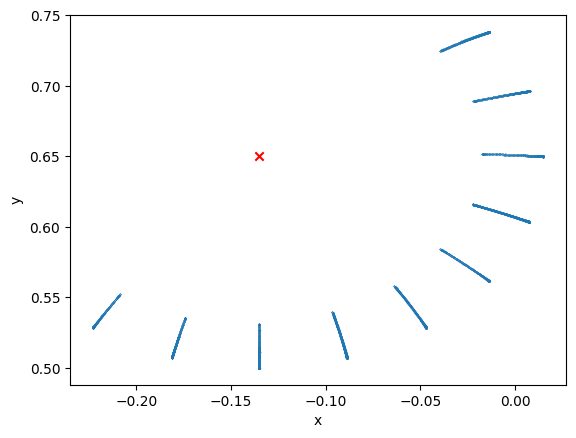

In [21]:
# graph the df: px against py as scatter plot
fig, ax = plt.subplots()

# Extract position and quaternion components from the DataFrame
x = df['px'].to_numpy()
y = df['py'].to_numpy()
z = df['pz'].to_numpy()
ox = df['ox'].to_numpy()
oy = df['oy'].to_numpy()
oz = df['oz'].to_numpy()
ow = df['ow'].to_numpy()

# make scatter markers smallest possible
ooo = 7000
ax.scatter(x[:ooo], y[:ooo], marker='.', s=0.1)

ax.set_xlabel('x')
ax.set_ylabel('y')

center = [-0.135,0.650]
ax.scatter(center[0], center[1], marker='x', color='red')

# set axis limits
axis_offset = 0.18
# ax.set_xlim(center[0]-axis_offset, center[0]+axis_offset)
# ax.set_ylim(center[1]-axis_offset, center[1]+axis_offset)

plt.show()

In [ ]:
z<27

array([ True,  True,  True, ...,  True,  True,  True])

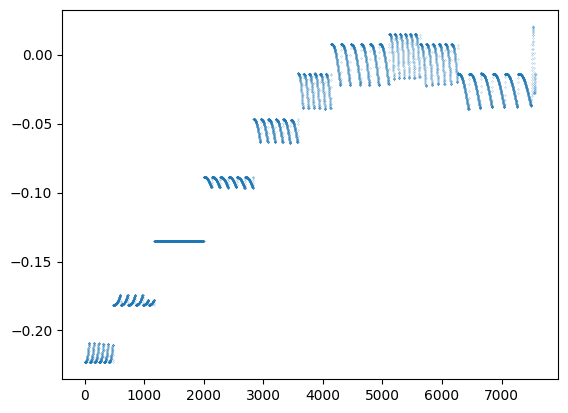

In [20]:
# graph pz as scatter plot against index
fig, ax = plt.subplots()
ax.scatter(range(len(z)), x, marker='.', s=0.1)


In [5]:
# split the dataset into batches each time z changes by more than 0.015
indices = []
for i in range(len(df)-1):
    if abs(df.iloc[i]['pz'] - df.iloc[i+1]['pz']) > 0.015:
        indices.append(i)

batches = []
start = 0
for index in indices:
    batches.append(df.iloc[start:index])
    start = index
batches.append(df.iloc[start:])

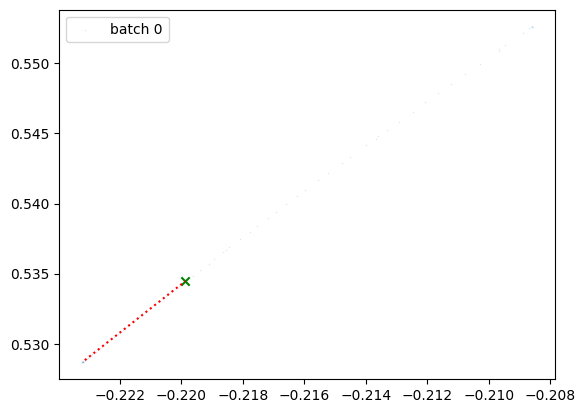

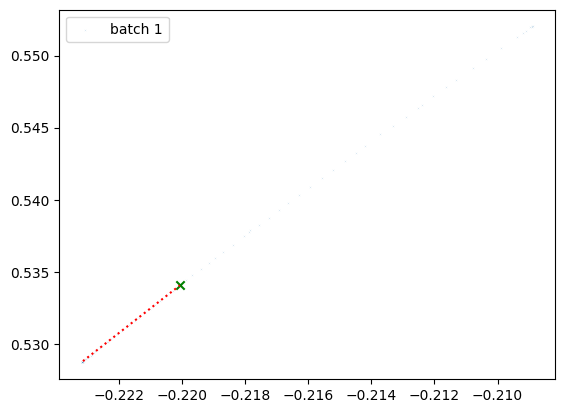

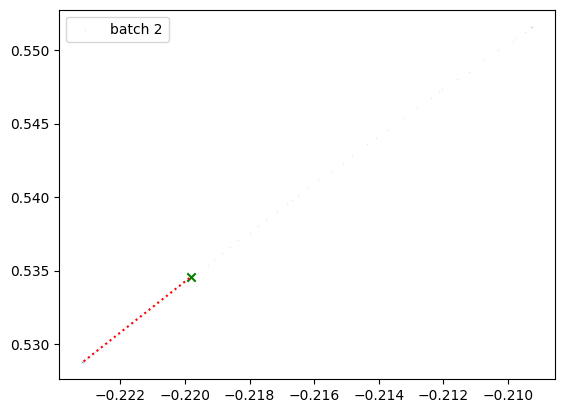

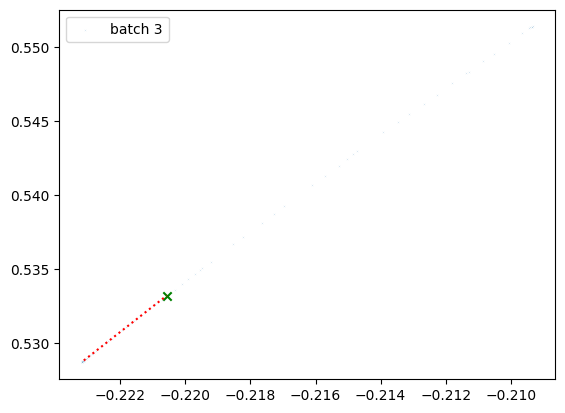

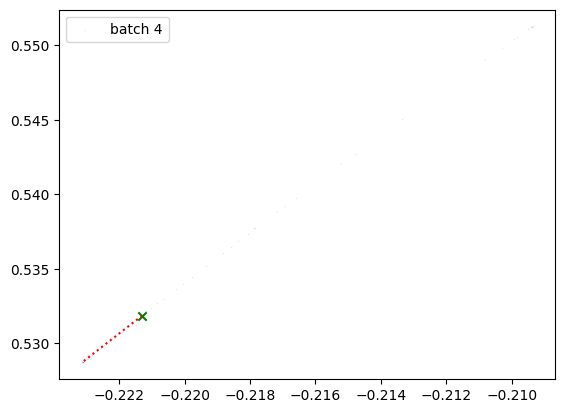

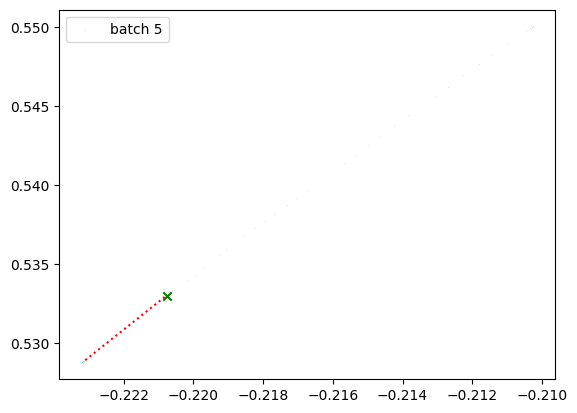

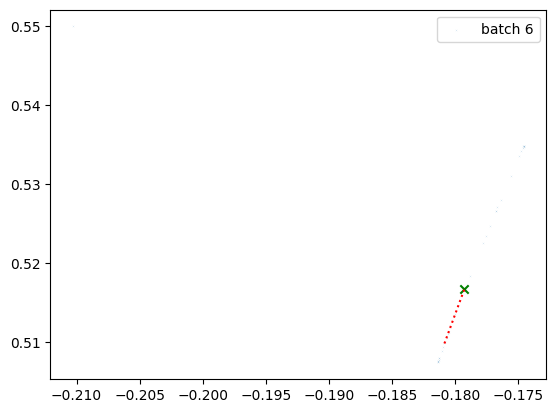

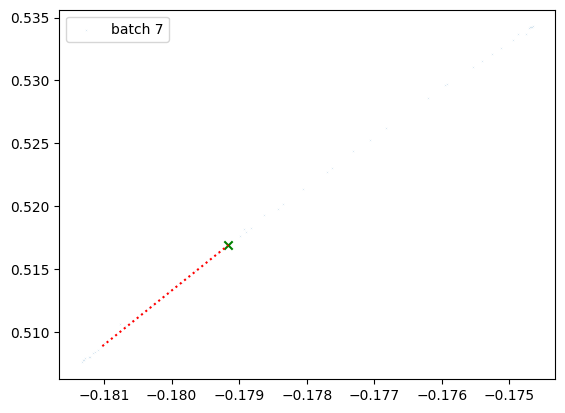

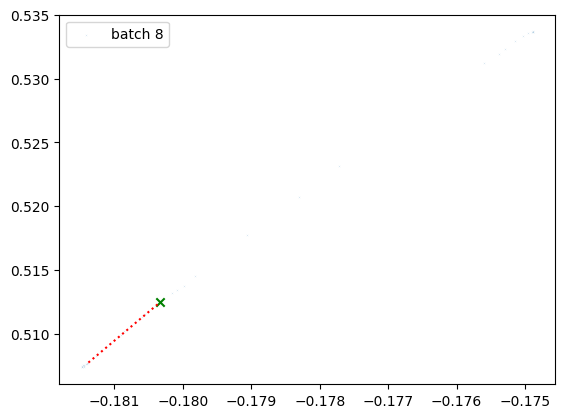

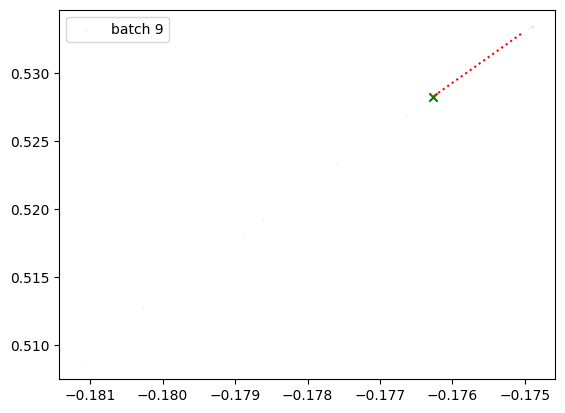

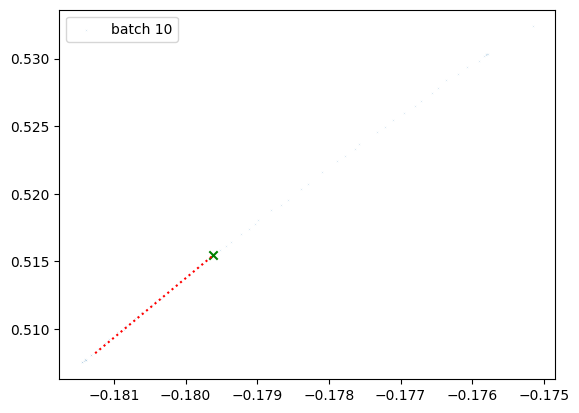

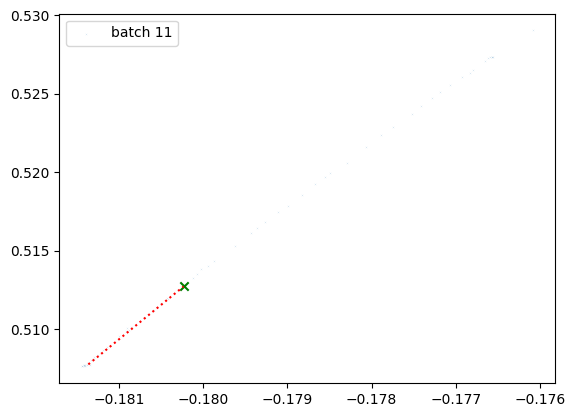

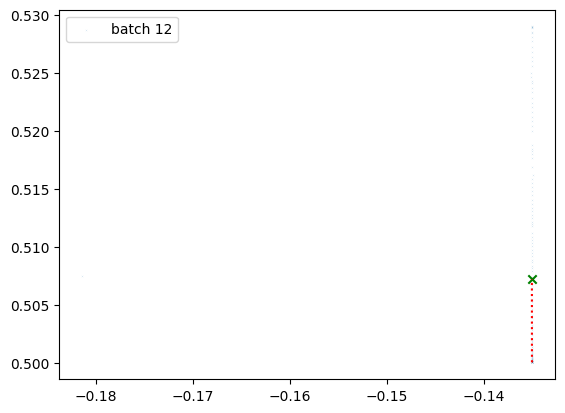

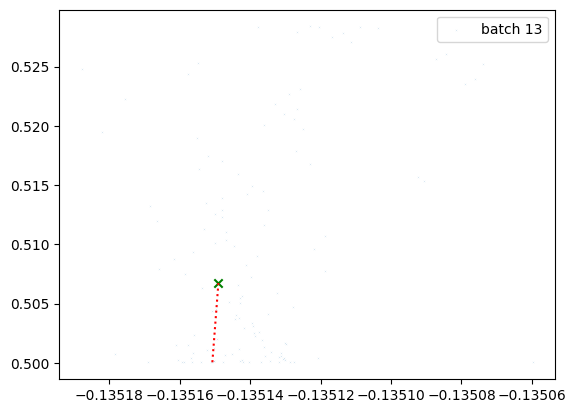

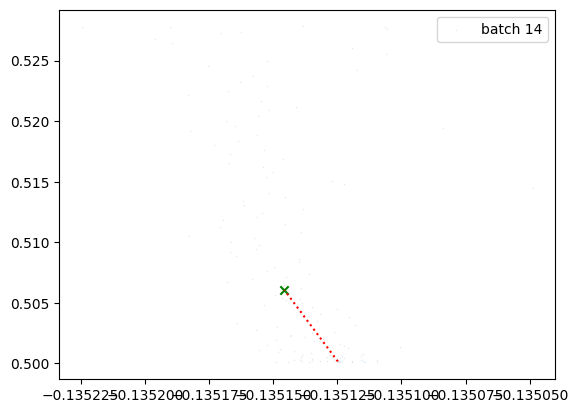

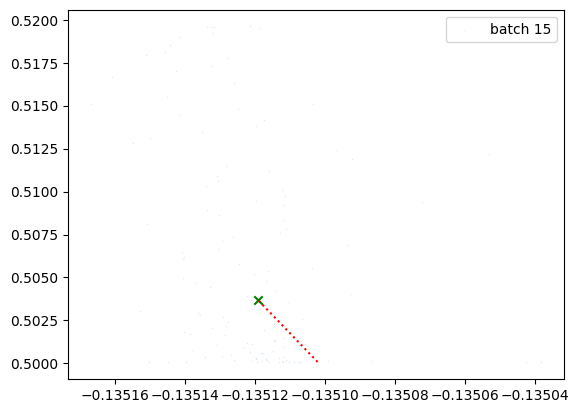

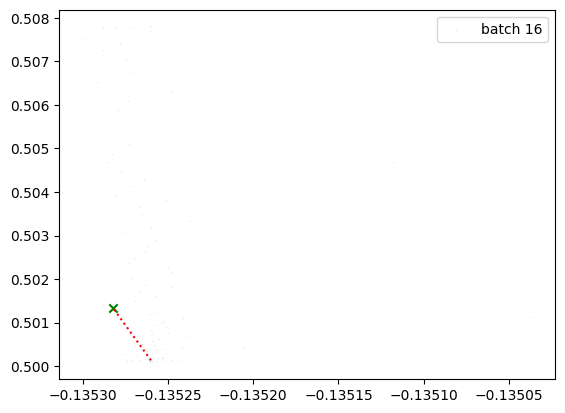

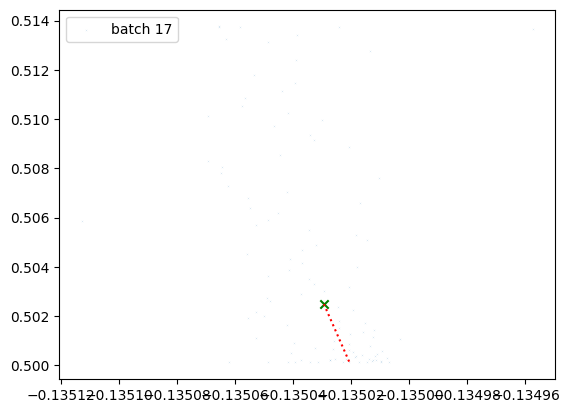

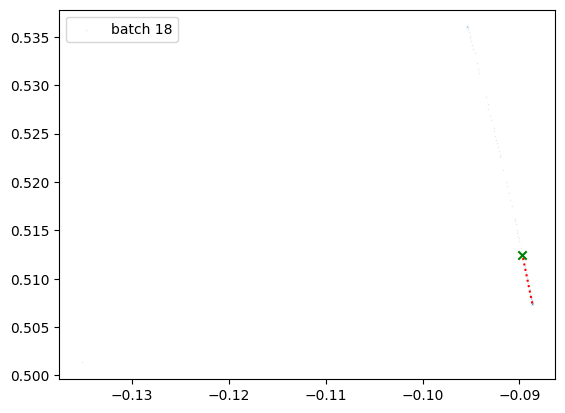

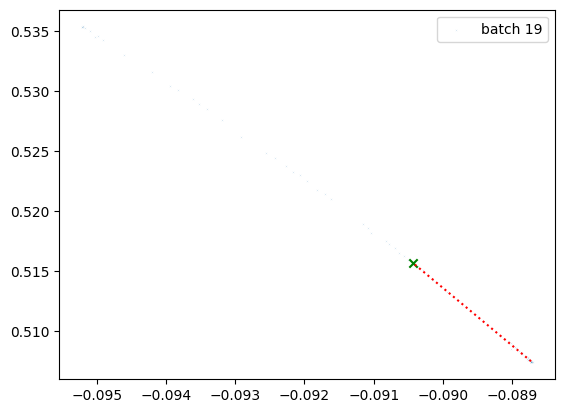

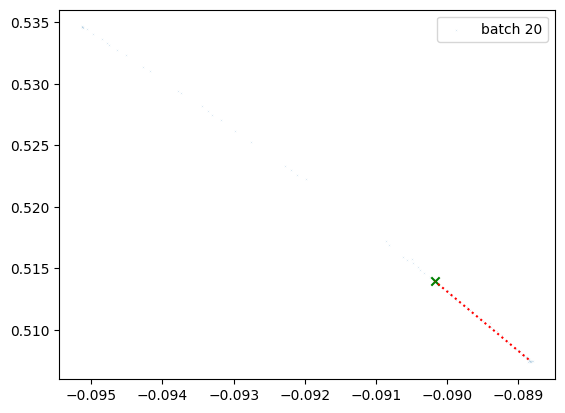

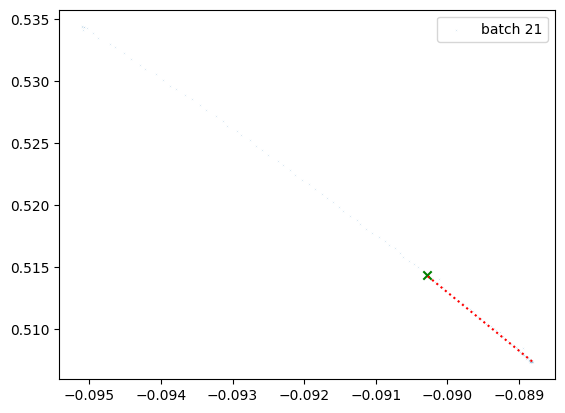

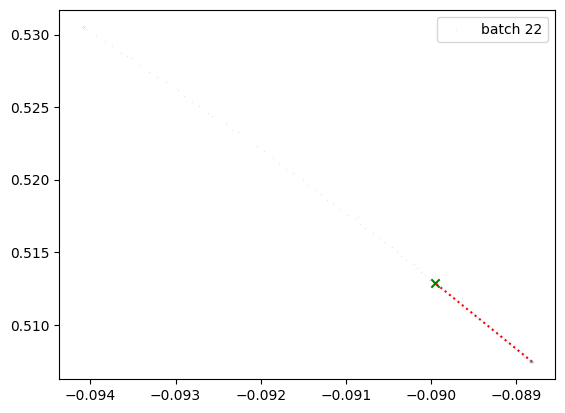

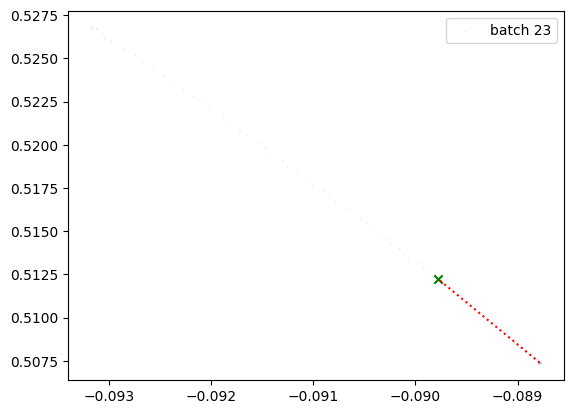

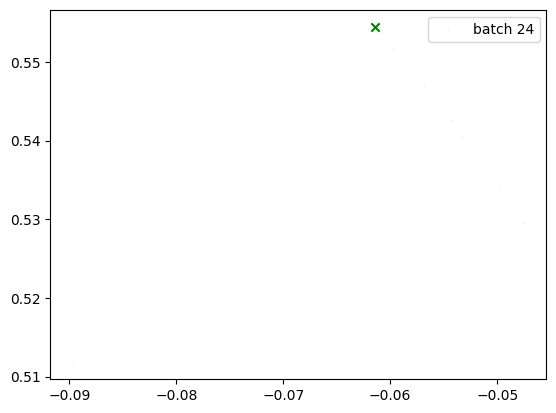

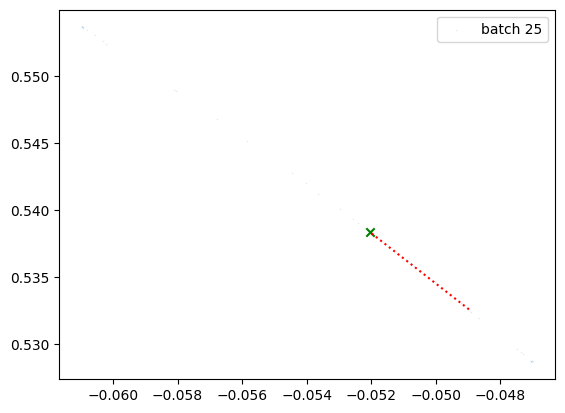

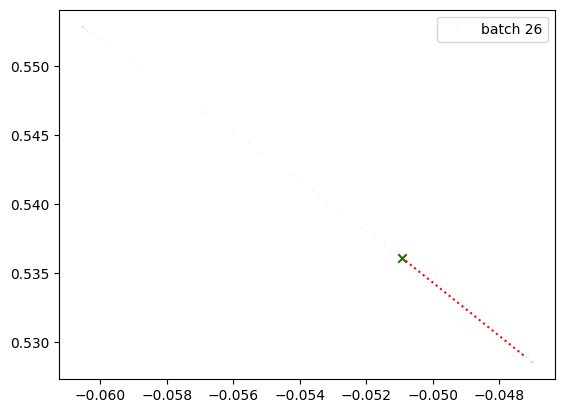

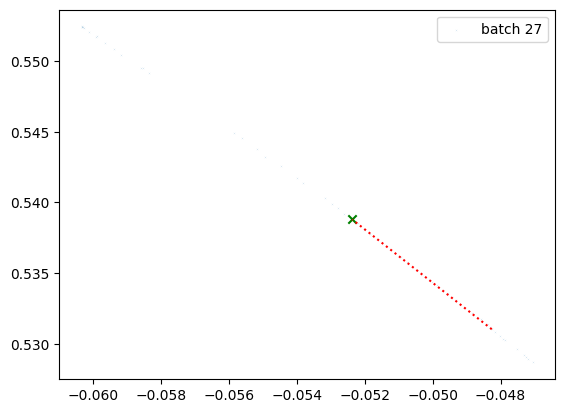

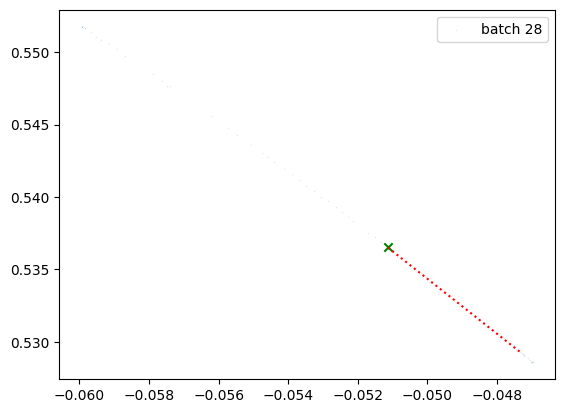

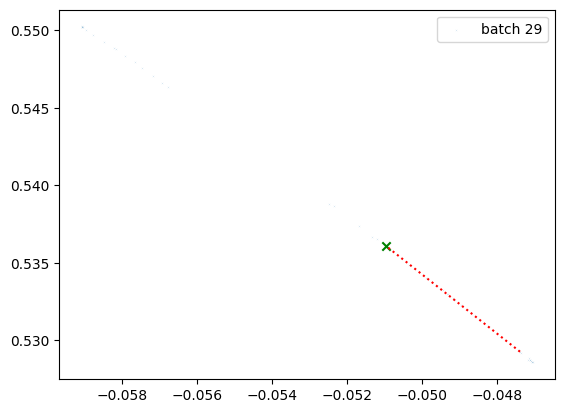

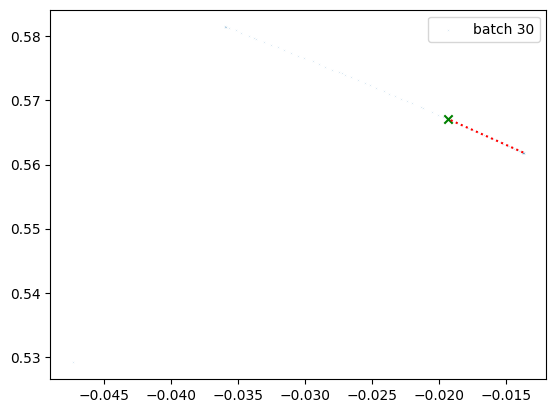

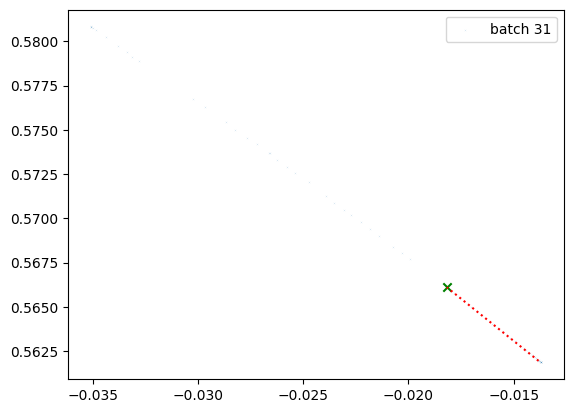

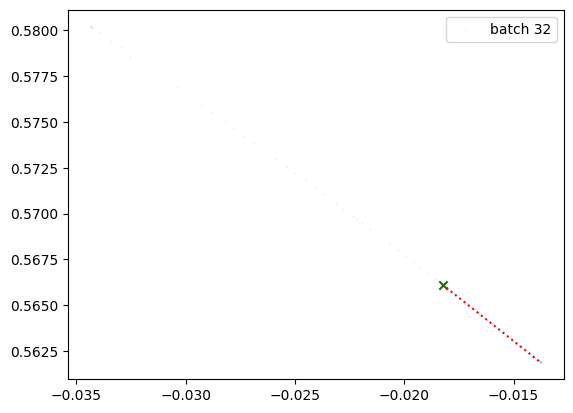

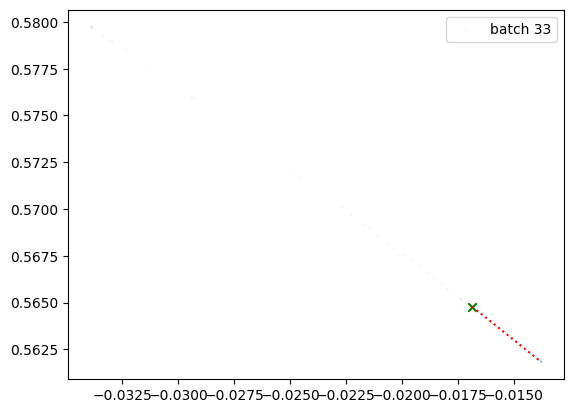

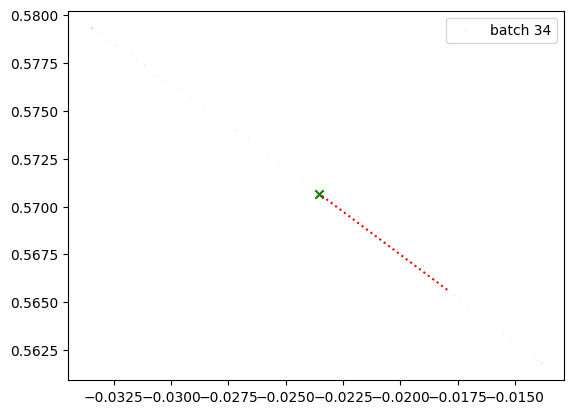

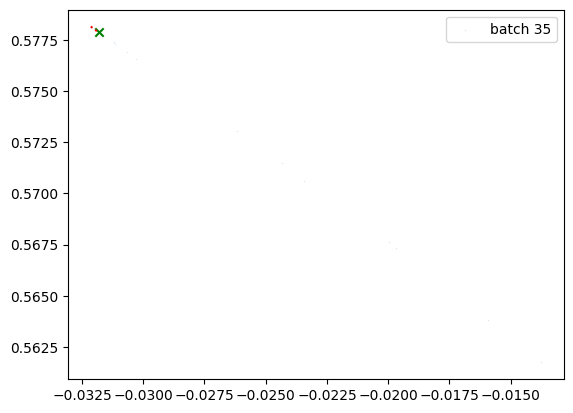

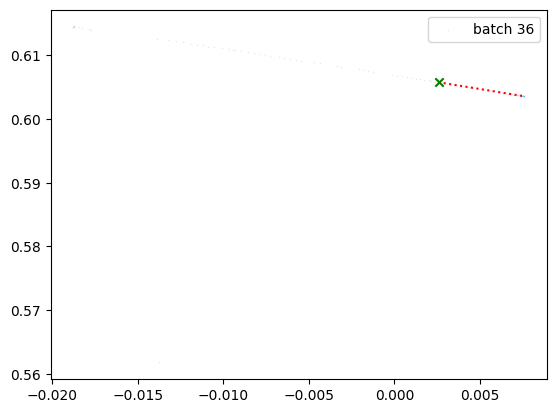

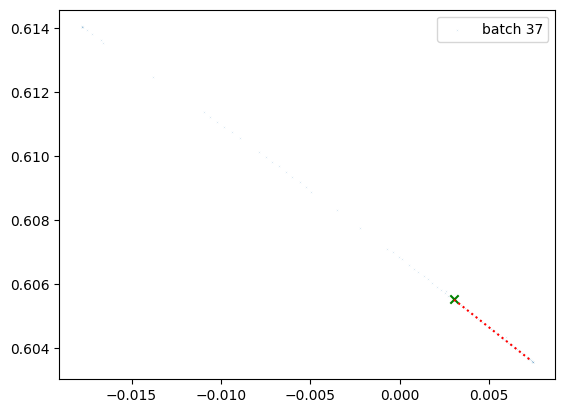

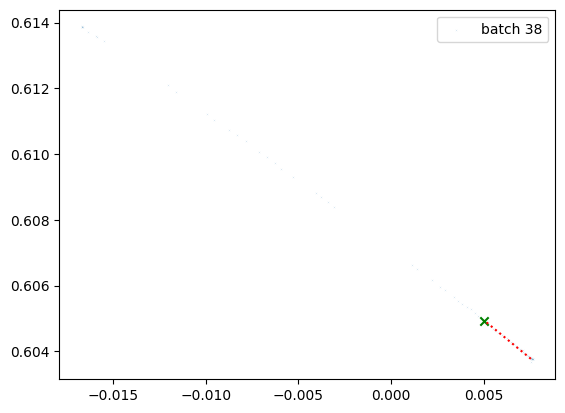

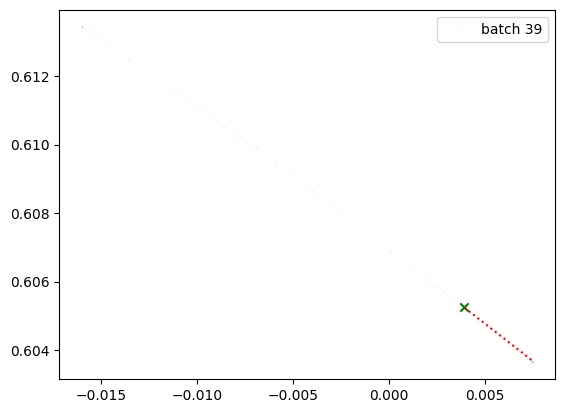

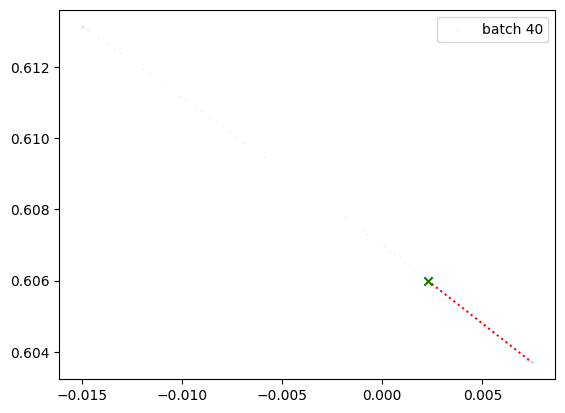

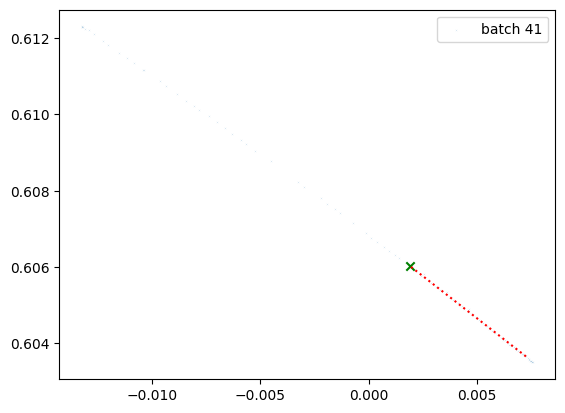

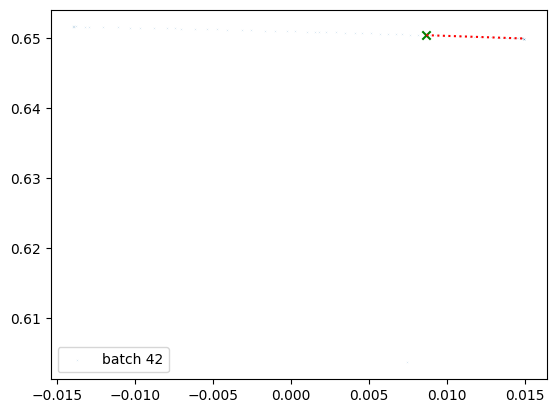

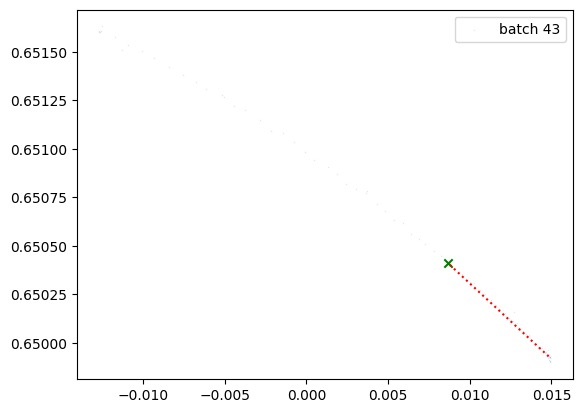

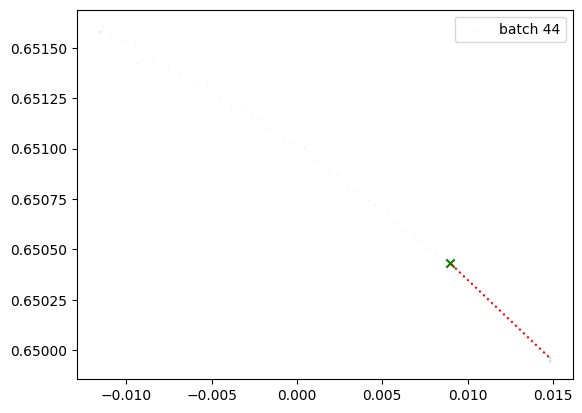

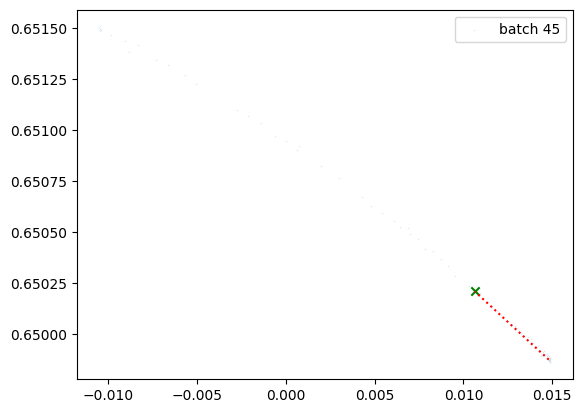

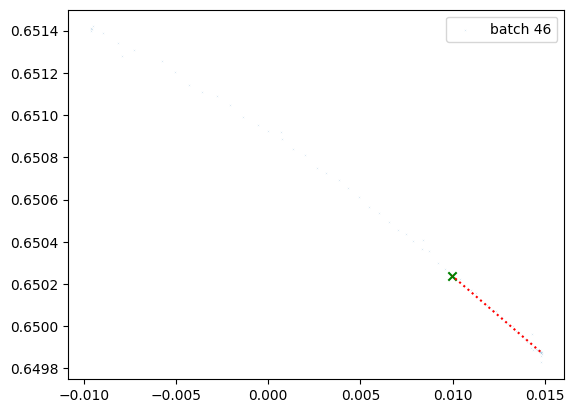

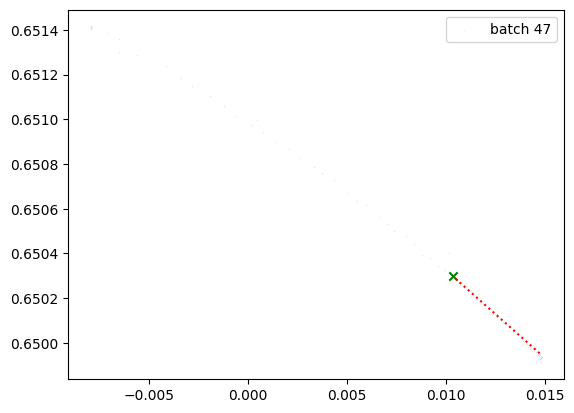

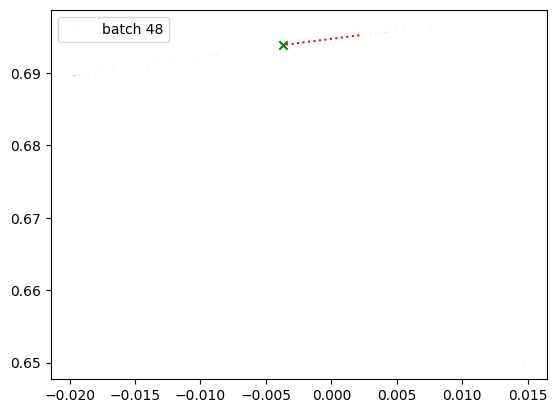

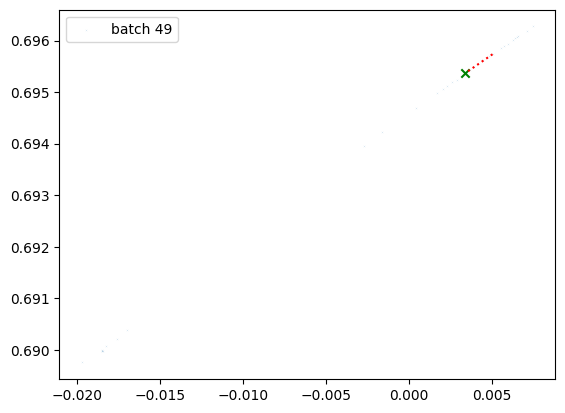

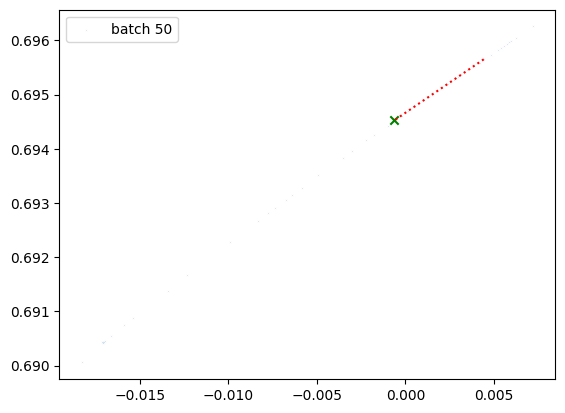

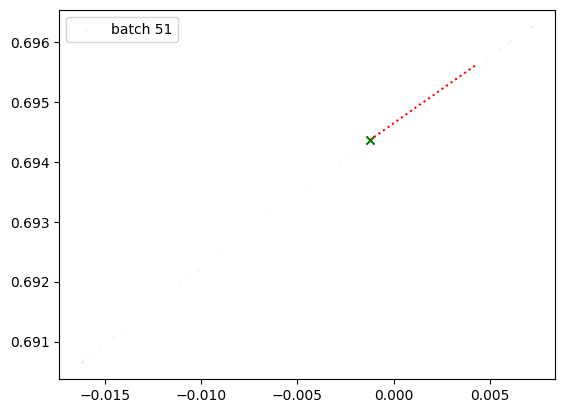

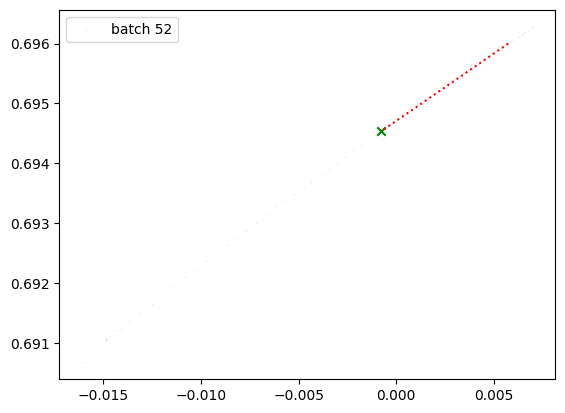

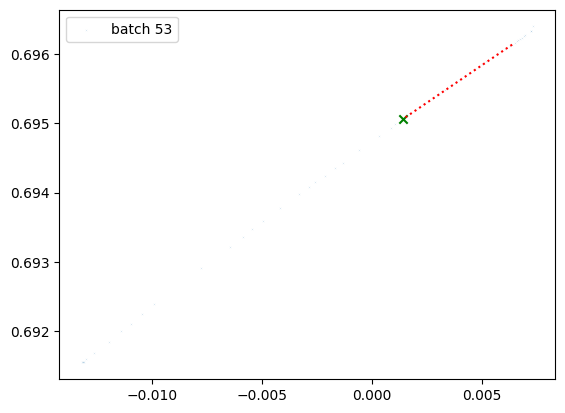

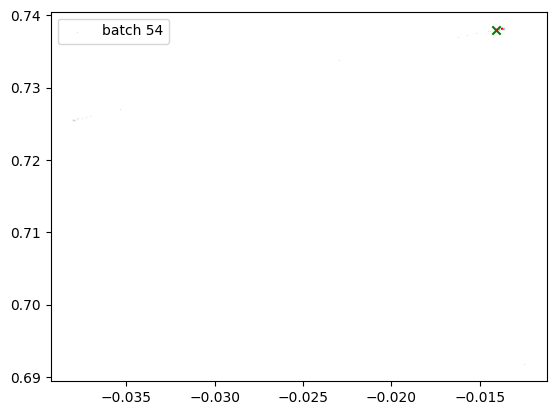

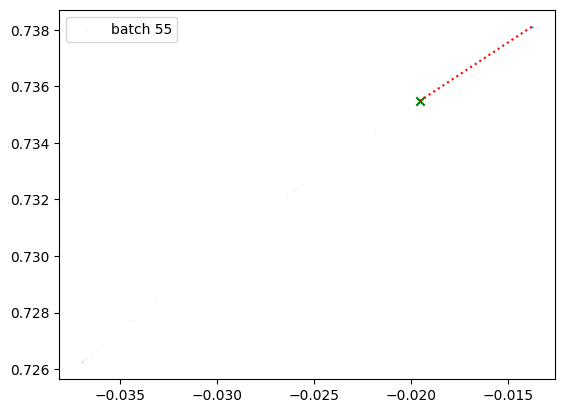

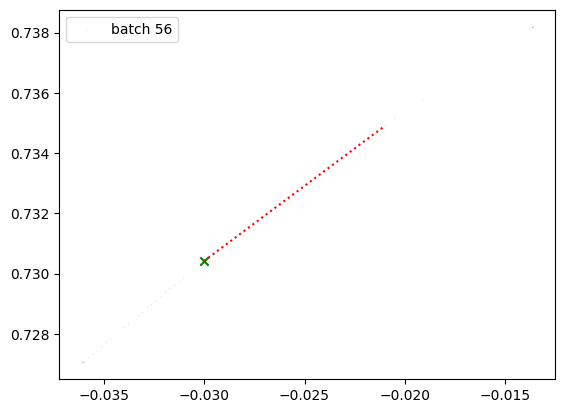

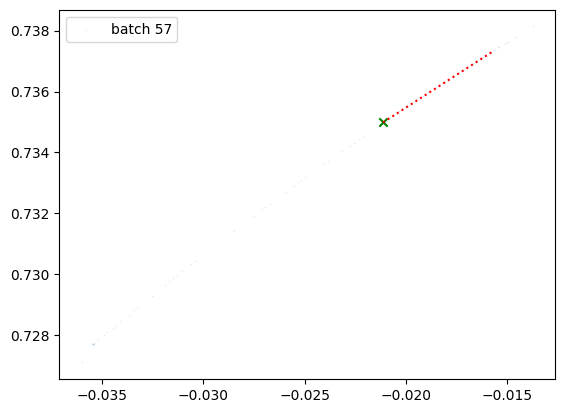

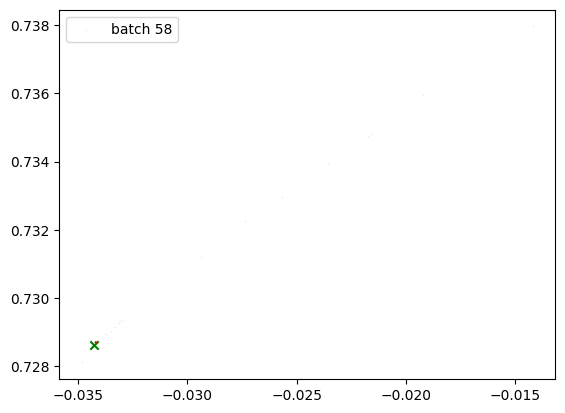

In [9]:
# plot each batch (px,py) in a new plot 
# draw a thin red dotted line from the 10th index to the coordinates stored in center
# draw a green cross at the coordinates stored in center
for i in range(len(batches)):
    batch = batches[i]
    middle_index = int((len(batch)-1)/2)
    plt.scatter(batch['px'], batch['py'], label=f'batch {i}', s=0.001, marker='x')
    plt.plot([batch['px'].iloc[10], batch['px'].iloc[middle_index]], [batch['py'].iloc[10], batch['py'].iloc[middle_index]], color='red', linestyle='dotted')
    plt.scatter(batch['px'].iloc[middle_index], batch['py'].iloc[middle_index], marker='x', color='green')
    plt.legend()
    plt.show()


In [ ]:
# plot each batch (px,py) in a new plot 
# draw a thin red dotted line from the 10th index to the coordinates stored in middle index
# draw a green cross at the coordinates stored in the middle index
# where middle index = (start index + end index) / 2
# include in the legend that the cross is called 'center'
for i in range(len(batches)):
    batch = batches[i]
    middle_index = int((len(batch)-1)/2)
    plt.scatter(batch['px'], batch['py'], label=f'batch {i}', s=0.001, marker='x')
    plt.plot([batch['px'].iloc[10], batch['px'].iloc[middle_index]], [batch['py'].iloc[10], batch['py'].iloc[middle_index]], color='red', linestyle='dotted')
    plt.scatter(batch['px'].iloc[middle_index], batch['py'].iloc[middle_index], marker='x', color='green')
    plt.legend()
    plt.show()

In [33]:
def plot_dataframes(dataframes):
    num_batches = len(dataframes)
    num_plots_per_row_top = 3
    num_plots_per_row_bottom = 2
    num_plots_per_batch = num_plots_per_row_top * 2  # 2 rows in each batch

    num_rows_top = num_batches // num_plots_per_batch

    for i in range(num_batches):
        if i % num_plots_per_batch == 0:
            fig, axes = plt.subplots(2, num_plots_per_row_top, figsize=(12, 8))
            fig.subplots_adjust(hspace=0.5)
            fig.suptitle(f'Batch Group {i // num_plots_per_batch + 1}')

        batch = dataframes[i]
        middle_index = int((len(batch)-1) / 2)

        row = (i % num_plots_per_batch) // num_plots_per_row_top
        col = (i % num_plots_per_batch) % num_plots_per_row_top
        ax = axes[row, col]

        ax.scatter(batch['px'], batch['py'], label=f'Batch {i}', s=0.001, marker='x')
        ax.plot([batch['px'].iloc[10], batch['px'].iloc[middle_index]],
                [batch['py'].iloc[10], batch['py'].iloc[middle_index]], color='red', linestyle='dotted')
        ax.scatter(batch['px'].iloc[middle_index], batch['py'].iloc[middle_index], marker='x', color='green')
        ax.set_xlabel('px')
        ax.set_ylabel('py')
        ax.legend()

    plt.show()

In [10]:
import numpy as np

def plot_dataframes(dataframes):
    num_batches = len(dataframes)
    num_plots_per_row_top = 5
    num_plots_per_row_bottom = 5
    num_plots_per_batch = num_plots_per_row_top * 2  # 2 rows in each batch

    num_rows_top = num_batches // num_plots_per_batch

    for i in range(num_batches):
        if i % num_plots_per_batch == 0:
            fig, axes = plt.subplots(2, num_plots_per_row_top, figsize=(12, 8))
            fig.subplots_adjust(hspace=0.5, wspace=0.5)
            fig.suptitle(f'Batch Group {i // num_plots_per_batch + 1}')

        batch = dataframes[i]
        # generate a value called middle_index which is the index of the batch where absolute force is the highest

        middle_index = np.argmax(np.abs(batch['force']))

        row = (i % num_plots_per_batch) // num_plots_per_row_top
        col = (i % num_plots_per_batch) % num_plots_per_row_top
        ax = axes[row, col]

        avg_x = np.mean(batch['px'])
        avg_y = np.mean(batch['py'])
        avg_z = np.mean(batch['pz'])

        ax.set_title(f'Approach at pz={avg_z:.2f}m', fontsize=8)

        ax.scatter(batch['px'], batch['py'], s=0.001, marker='x')
        ax.plot([batch['px'].iloc[10], batch['px'].iloc[middle_index]],
                [batch['py'].iloc[10], batch['py'].iloc[middle_index]], color='red', linestyle='dotted')
        ax.scatter(batch['px'].iloc[middle_index], batch['py'].iloc[middle_index], marker='x', color='green')
        ax.set_xlabel('px')
        ax.set_ylabel('py')

        # resize the axes to a 0.2m x 0.2m square around the average x and y coordinates
        ax.set_xlim(avg_x - 0.07, avg_x + 0.07)
        ax.set_ylim(avg_y - 0.07, avg_y + 0.07)

        # calculate the line equation parameters (y = mx + b)
        x1, x2 = batch['px'].iloc[10], batch['px'].iloc[middle_index]
        y1, y2 = batch['py'].iloc[10], batch['py'].iloc[middle_index]
        m = (y2 - y1) / (x2 - x1)
        b = y1 - m * x1

        # calculate the maximum Euclidean distance from the points to the line
        distances = np.abs(m * batch['px'] - batch['py'] + b) / np.sqrt(m**2 + 1)
        max_distance = np.max(distances)
        ax.set_title(f'pz={avg_z:.2f}m, max dev={max_distance:.4f}', fontsize=8)


        
    plt.show()

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot_dataframes(dataframes):
    num_batches = len(dataframes)
    num_plots_per_row_top = 3
    num_plots_per_row_bottom = 2
    num_plots_per_batch = num_plots_per_row_top * 2  # 2 rows in each batch

    num_rows_top = num_batches // num_plots_per_batch

    for i in range(num_batches):
        if i % num_plots_per_batch == 0:
            fig, axes = plt.subplots(2, num_plots_per_row_top, figsize=(12, 8))
            fig.subplots_adjust(hspace=0.5)
            fig.suptitle(f'Batch Group {i // num_plots_per_batch + 1}')

        batch = dataframes[i]
        middle_index = int((len(batch)-1) / 2)

        row = (i % num_plots_per_batch) // num_plots_per_row_top
        col = (i % num_plots_per_batch) % num_plots_per_row_top
        ax = axes[row, col]

        avg_z = np.mean(batch['pz'])
        ax.set_title(f'Approach at z={avg_z:.2f}')

        ax.scatter(batch['px'], batch['py'], label=f'Batch {i}', s=0.001, marker='x')
        ax.plot([batch['px'].iloc[10], batch['px'].iloc[middle_index]],
                [batch['py'].iloc[10], batch['py'].iloc[middle_index]], color='red', linestyle='dotted')
        ax.scatter(batch['px'].iloc[middle_index], batch['py'].iloc[middle_index], marker='x', color='green')
        ax.set_xlabel('px')
        ax.set_ylabel('py')
        ax.legend()

    plt.show()

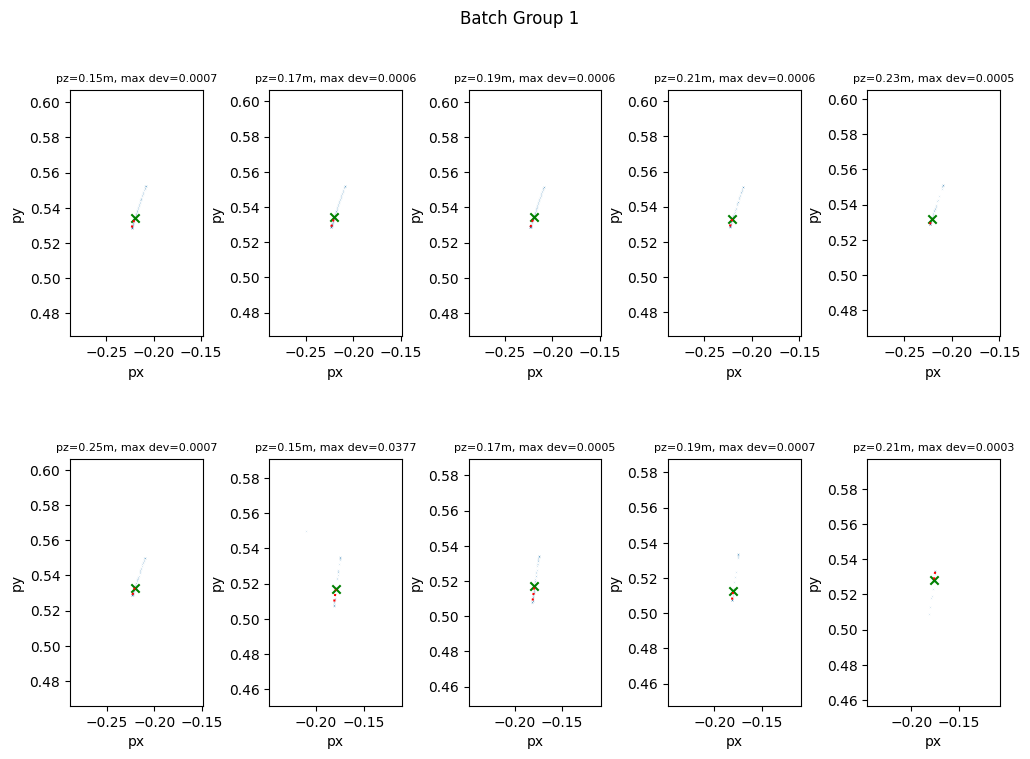

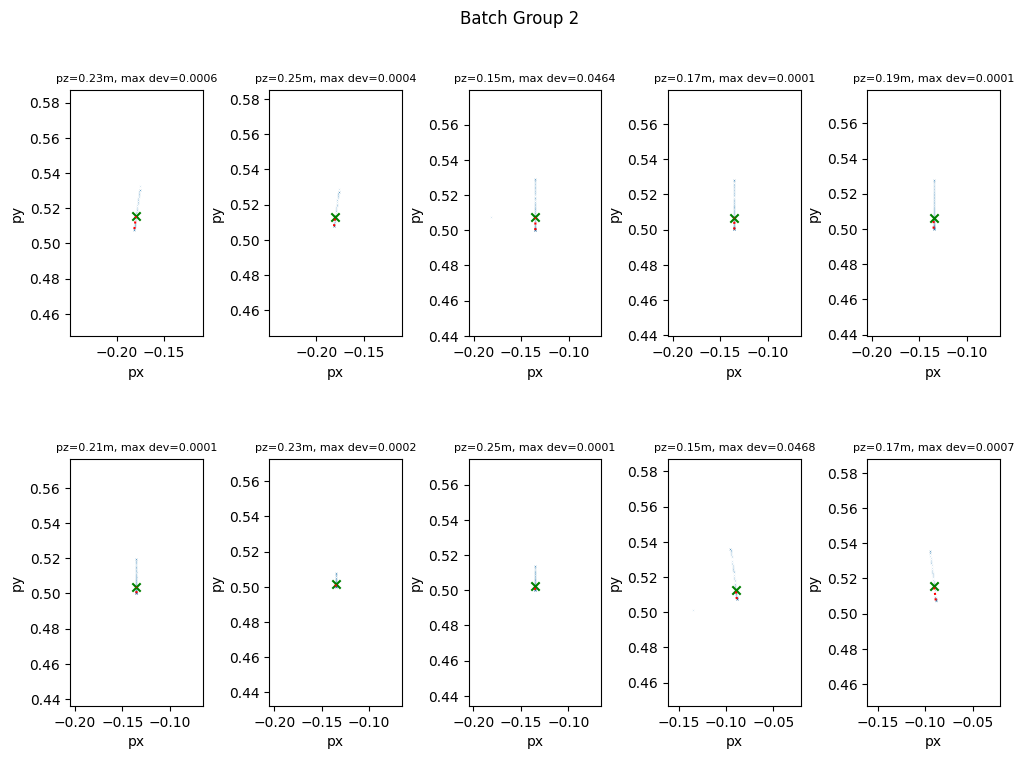

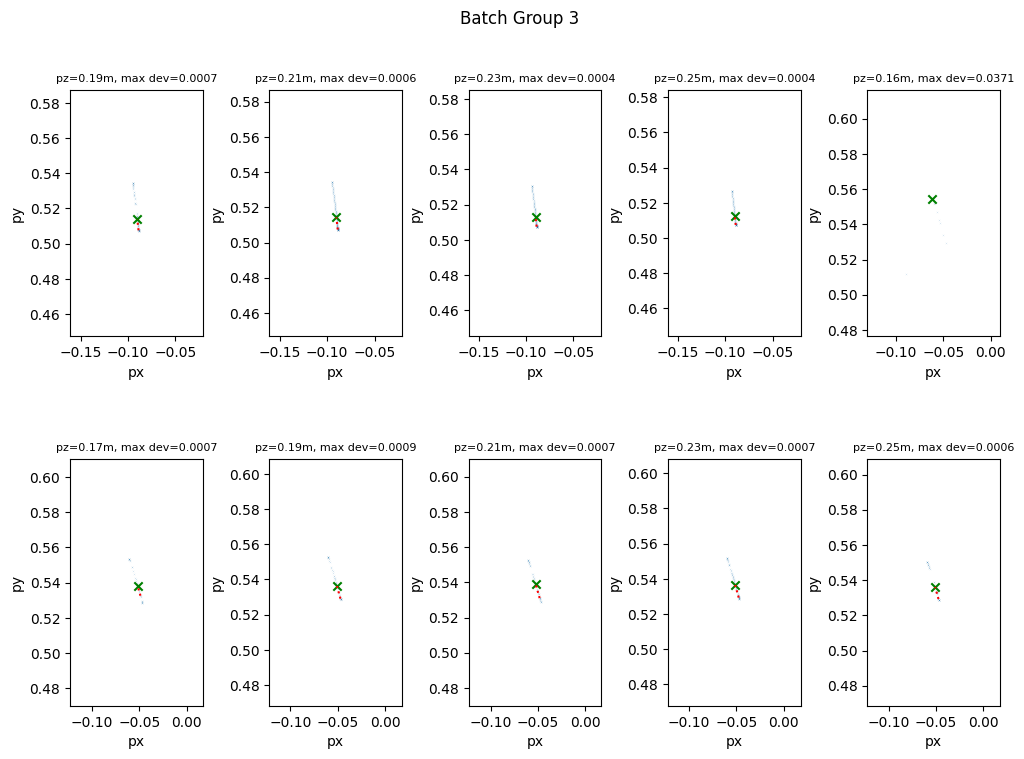

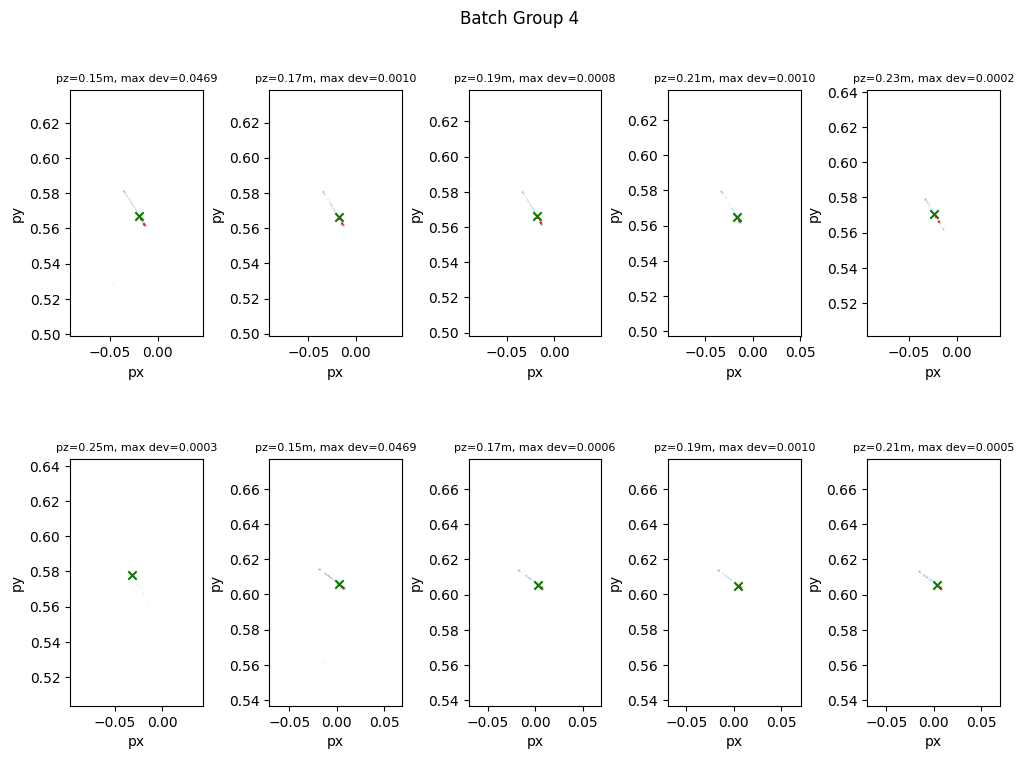

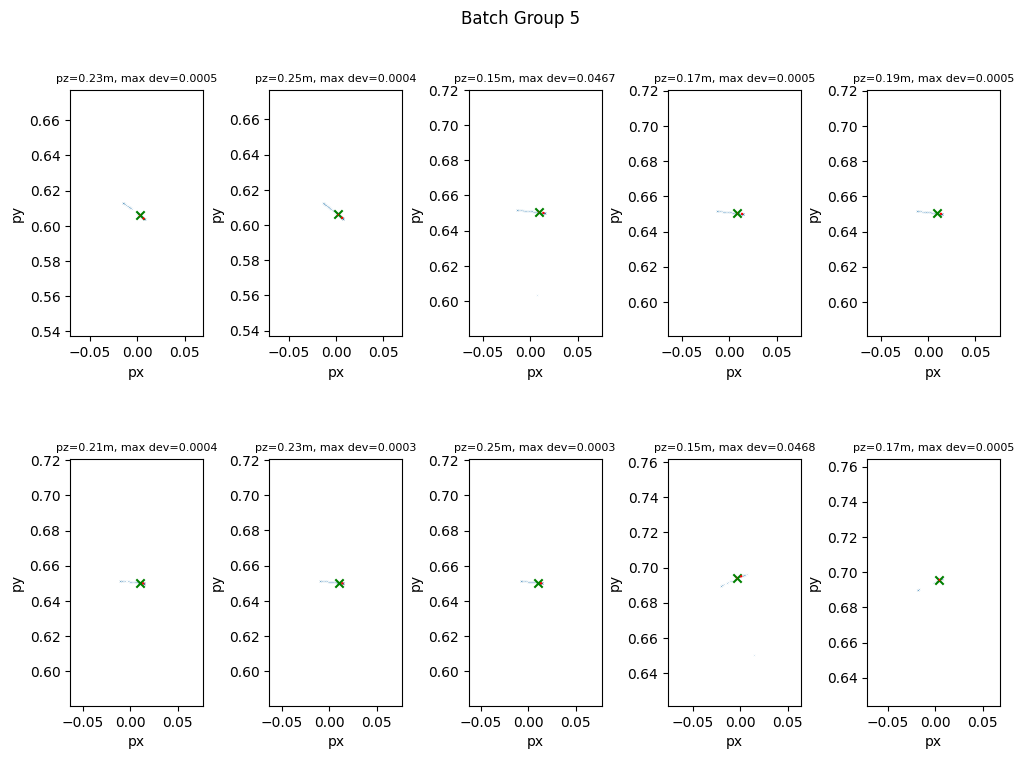

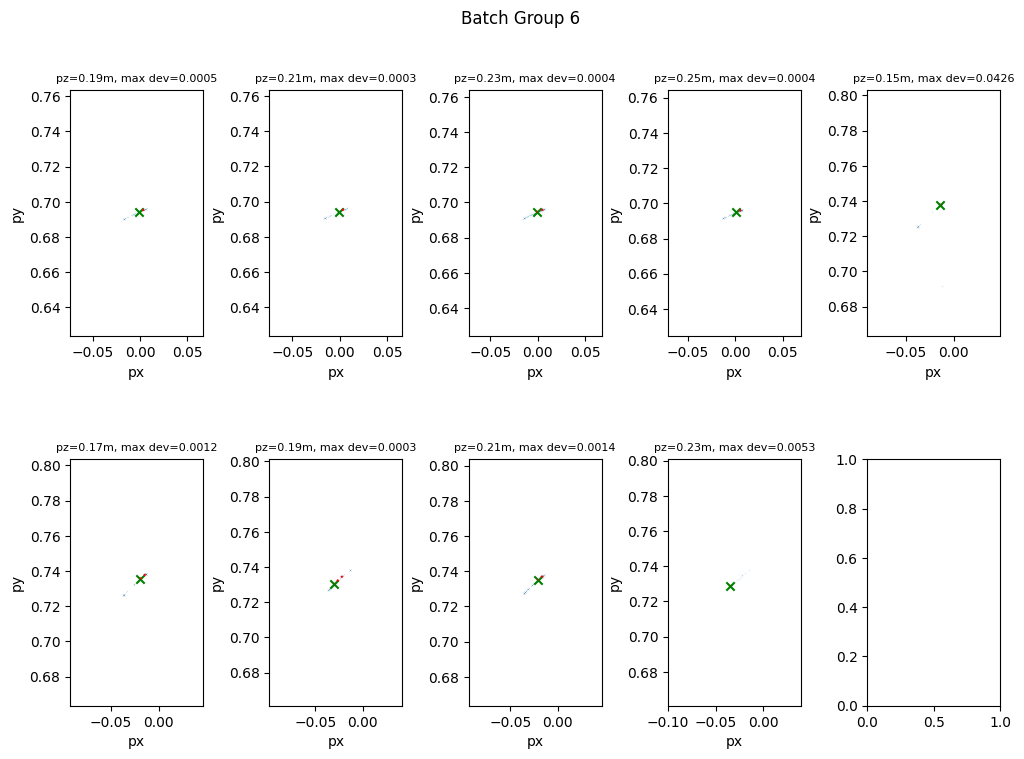

In [11]:
plot_dataframes(batches)